# RNN을 이용한 자동완성 (tensorflow 2.x)


In [ ]:
import numpy as np
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

X = np.array([
              [h, e, l, l],
              [e, l, h, e]
              ], dtype = 'float32')

y = np.array([ o, l ], dtype="float32")
print("X_shape:",X.shape)

X_shape: (2, 4, 4)


In [ ]:
model = Sequential()
model.add(SimpleRNN( units=1, input_shape=(4,4)))
model.add(Dense(4, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1)                 6         
_________________________________________________________________
dense (Dense)                (None, 4)                 8         
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 컴파일
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.1),
              metrics = ['acc']
              )

<bound method Model.fit of <keras.engine.sequential.Sequential object at 0x7f375fb9cbd0>>

In [ ]:
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.2755 - acc: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0372 - acc: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.9505 - acc: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.9033 - acc: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 0.8612 - acc: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 0.8204 - acc: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 0.7833 - acc: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.7531 - acc: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 0.7321 - acc: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 0.7204 - acc: 1.0000
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.7153 -

In [ ]:
np.argmax(model.predict(X),1 )

array([3, 2])

# RNN을 이용한 감정분석 (텐서플로 2.x)


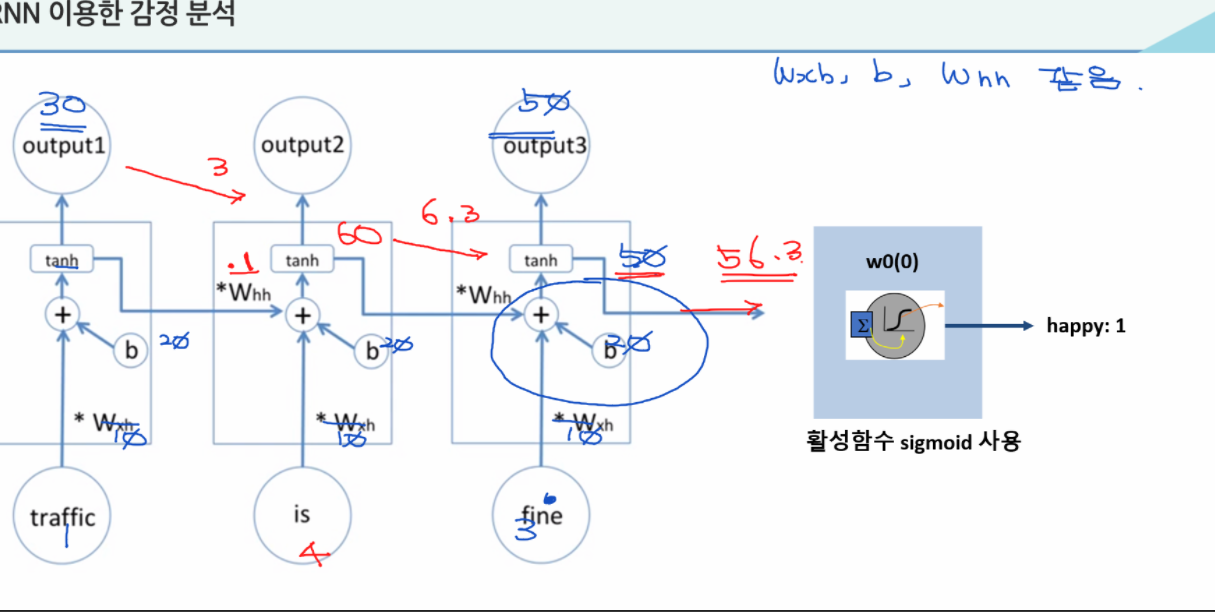

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# 단어 빈도수가 높은 Traffic가 1, 빈도수가 동일하면 순서대로 번호 
X_train = [
           "Traffic ticker fines",
           "Traffic is fine"
            ]

y_train = np.array([0, 1], dtype="float32")

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# 빈도수 기준으로 번호 붙인 결과
X_tokens = tokenizer.texts_to_sequences(X_train)
print("X_tokens")

print(tokenizer.word_index)


X_tokens
{'traffic': 1, 'ticker': 2, 'fines': 3, 'is': 4, 'fine': 5}


In [ ]:
X_onehot = to_categorical(X_tokens)
X_onehot

array([[[0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.]],

       [[0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]]], dtype=float32)

In [ ]:
model = Sequential()

# input_shape : 입력 데이터의 줄,칸
# units = RNNCell의 계산 결과 개수
model.add(SimpleRNN(input_shape = (3, 6) , units =1))

model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 1)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
               loss="binary_crossentropy",
                optimizer=Adam(learning_rate=0.1),
                metrics=["acc"]
              )

model.fit(X_onehot, y_train, epochs = 30)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 1.1180 - acc: 0.5000
Epoch 2/30
1/1 [==============================] - 0s 6ms/step - loss: 0.9881 - acc: 0.5000
Epoch 3/30
1/1 [==============================] - 0s 12ms/step - loss: 0.8993 - acc: 0.5000
Epoch 4/30
1/1 [==============================] - 0s 12ms/step - loss: 0.8318 - acc: 0.5000
Epoch 5/30
1/1 [==============================] - 0s 4ms/step - loss: 0.7771 - acc: 0.5000
Epoch 6/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7313 - acc: 0.5000
Epoch 7/30
1/1 [==============================] - 0s 10ms/step - loss: 0.6920 - acc: 0.5000
Epoch 8/30
1/1 [==============================] - 0s 4ms/step - loss: 0.6561 - acc: 0.5000
Epoch 9/30
1/1 [==============================] - 0s 6ms/step - loss: 0.6208 - acc: 1.0000
Epoch 10/30
1/1 [==============================] - 0s 8ms/step - loss: 0.5857 - acc: 1.0000
Epoch 11/30
1/1 [==============================] - 0s 10ms/step - loss: 0.5546 - acc: 0

In [ ]:
pred = model.predict(X_onehot)

pred

array([[0.09576318],
       [0.8693496 ]], dtype=float32)

# RNN 이용한 자동완성 (텐서플로 2.x)

- 단어 3개 입력  -> 마지막 1개
(결과는 10개 출력)

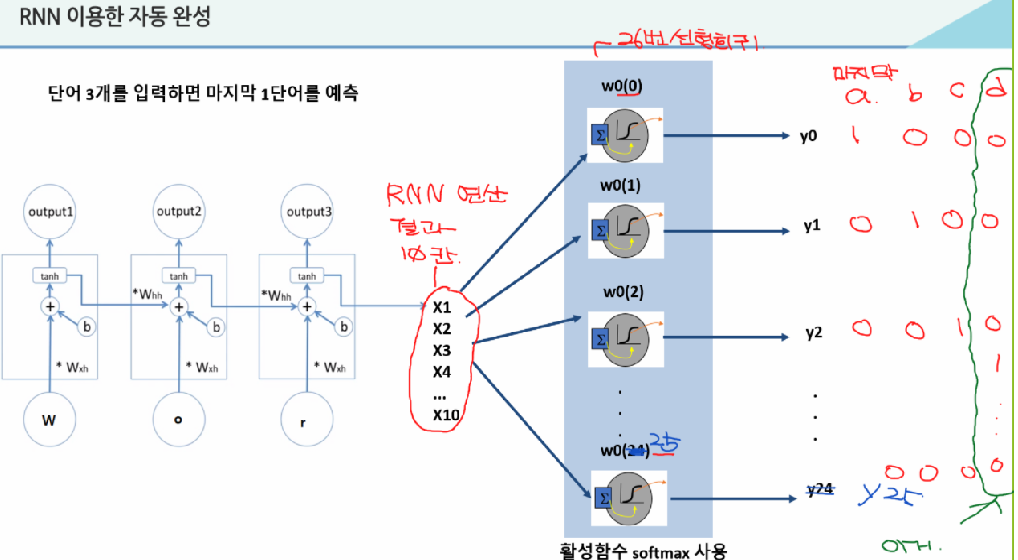

In [108]:
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

In [33]:
X_train = [
           "wor", "woo", "dee", "div", "col",
           "coo", "loa", "lov", "kis", "kin"
           ]

y_train = [
            "d",   "d" ,  "p",  "e"  ,"d",
            "d",   "d"  , "e" , "s" , "d"
           ]

char_arr = [
            'a','b','c','d','e','f','g',
            'h','i','j','k','l','m','n',
            'o','p','q','r','s','t','u',
            'v','w','x','y','z'
]

In [ ]:
for i, char in enumerate(char_arr):
  print("i =",i)
  print("char = ",char)
  print("=" * 100)

In [36]:
# 문자 : 숫자 형태로 변환
num_dict = {char : i for i , char in enumerate(char_arr)}
num_dict

In [38]:
for char in 'wor':
  print("char = ", char)
  print("바꿀 숫자 =",num_dict[char])
  print("=" *100)

char =  w
바꿀 숫자 = 22
char =  o
바꿀 숫자 = 14
char =  r
바꿀 숫자 = 17


In [40]:
input = [num_dict[char]    for char in "wor"]
input

[22, 14, 17]

In [71]:
np.eye(5)[[0, 1, 4]]

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [96]:
# 원핫 인코딩
X_train_onehot = []
for seq in X_train:
  print("seq =",seq)
  input = [num_dict[char] for char in seq]
  print("input =", input)
  onehot = np.eye(26)[input]
  print("onehot =\n",onehot)
  X_train_onehot.append(onehot)
  print("=" *100)

seq = wor
input = [22, 14, 17]
onehot =
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0.]]
seq = woo
input = [22, 14, 14]
onehot =
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
seq = dee
input = [3, 4, 4]
onehot =
 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
seq = div
input = [3, 8, 21]
onehot =
 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 

In [97]:
X_train_onehot

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0.,

In [ ]:
# 타입변환
X_train_onehot = np.array(X_train_onehot, dtype = np.float32)
X_train_onehot

In [120]:
y_train_tokens = [num_dict[char] for char in y_train]
print(y_train_tokens)

# 인코딩
y_train_onehot = np.eye(26)[y_train_tokens]

[3, 3, 15, 4, 3, 3, 3, 4, 18, 3]


In [114]:
model = Sequential()

model.add(SimpleRNN(units = 10, input_shape = (3, 26)))

model.add(Dense(26, activation = 'softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 10)                370       
_________________________________________________________________
dense_3 (Dense)              (None, 26)                286       
Total params: 656
Trainable params: 656
Non-trainable params: 0
_________________________________________________________________


In [121]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.1),
              metrics = ['acc']
              )
model.fit(X_train_onehot, y_train_onehot, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 781ms/step - loss: 3.2680 - acc: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 2.1345 - acc: 0.7000
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 1.2036 - acc: 0.7000
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 0.8113 - acc: 0.7000
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6330 - acc: 0.8000
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 0.5112 - acc: 0.8000
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 0.4155 - acc: 0.8000
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3237 - acc: 0.9000
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2414 - acc: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2028 - acc: 0.9000
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 

# 실습

# RNN 이용한 자동완성 (텐서플로 2.x)

- 62 ~69

In [122]:
import numpy as np
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [123]:
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

X = np.array([
              [h, e, l, l]
              ], dtype = 'float32')

y = np.array([ o ], dtype="float32")
print("X_shape:",X.shape)

X_shape: (1, 4, 4)


In [125]:
model = Sequential()
model.add(SimpleRNN( units=1, input_shape=(4,4)))
model.add(Dense(4, activation="softmax"))
model.summary()

# 모델 컴파일
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.1),
              metrics = ['acc']
              )

# 학습
model.fit(X, y, epochs = 10)

# 예측
print(np.argmax(model.predict(X),1))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 1)                 6         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 8         
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1/1 [==============================] - 1s 739ms/step - loss: 0.9773 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 0.7350 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 0.5441 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.3963 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 0.2859 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 5ms/step -

# RNN을 이용한  감정 분석 (텐서플로 2.x)

- 70 ~78


In [126]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

In [127]:
# 단어 빈도수가 높은 Traffic가 1, 빈도수가 동일하면 순서대로 번호 
X_train = [
           "Traffic ticker fines",
           "Traffic is fine"
            ]

# 긍정 부정 판별 결과
# 부정 0 , 긍정 1
y_train = np.array([0, 1], dtype="float32")

In [128]:
# X_train의 단어들을 숫자로 변환시키는 객체
tokenizer = Tokenizer()

# 빈도수 확인
tokenizer.fit_on_texts(X_train)

# 빈도수 기준으로 번호 붙인 결과
X_tokens = tokenizer.texts_to_sequences(X_train)
print("X_tokens")

print(tokenizer.word_index)


X_tokens
{'traffic': 1, 'ticker': 2, 'fines': 3, 'is': 4, 'fine': 5}


In [129]:
# 인코딩
X_onehot = to_categorical(X_tokens)
X_onehot

array([[[0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.]],

       [[0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]]], dtype=float32)

In [130]:
# 모델
model = Sequential()

# input_shape : 입력 데이터의 줄,칸
# units = RNNCell의 계산 결과 개수
model.add(SimpleRNN(input_shape = (3, 6) , units =1))

model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 1)                 8         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [131]:
# 예측
pred = model.predict(X_onehot)

predict01 = np.where(pred > 0.5 , 1, 0)
print("predict01 :", predict01)

predict01 : [[0]
 [1]]


# RNN을 이용한 자동 완성 -2(텐서플로 2.x)

- 83 ~ 93


In [4]:
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

In [5]:
# 입력할 단어 3개
X_train = [
           "wor", "woo", "dee", "div", "col",
           "coo", "loa", "lov", "kis", "kin"
           ]
# X_train의 3개 단어 입력시 예측 단어
y_train = [
            "d",   "d" ,  "p",  "e"  ,"d",
            "d",   "d"  , "e" , "s" , "d"
           ]
# 영어알파벳 리스트
char_arr = [
            'a','b','c','d','e','f','g',
            'h','i','j','k','l','m','n',
            'o','p','q','r','s','t','u',
            'v','w','x','y','z'
]

In [ ]:
# 문자를 char
# 인덱스를 i
num_dic = {char : i for i, char in enumerate(char_arr)}

# X_train의 단어를 숫자로 뽑고 인코딩
# 원핫 인코딩
X_train_onehot = []
for seq in X_train:
  print("seq =",seq)
  input = [num_dic[char] for char in seq]
  print("input =", input)
  onehot = np.eye(26)[input]
  print("onehot =\n",onehot)
  X_train_onehot.append(onehot)
  print("=" *100)

In [ ]:
# 타입변환
X_train_onehot = np.array(X_train_onehot, dtype = np.float32)
X_train_onehot

In [9]:
y_train_tokens = [num_dic[char] for char in y_train]
print(y_train_tokens)

# 인코딩
y_train_onehot = np.eye(26)[y_train_tokens]

[3, 3, 15, 4, 3, 3, 3, 4, 18, 3]


In [10]:
model = Sequential()

model.add(SimpleRNN(units = 10, input_shape = (3, 26)))

model.add(Dense(26, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                370       
_________________________________________________________________
dense (Dense)                (None, 26)                286       
Total params: 656
Trainable params: 656
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.1),
              metrics = ['acc']
              )
model.fit(X_train_onehot, y_train_onehot, epochs = 100)

In [17]:
# 예측
new_data = ['hel', 'mul', 'goo']

new_data_onehot = []

for seq in new_data:
  print("seq: ",seq)
  # 숫자로 변환
  input = [num_dic[char] for char in seq]
  print("input:", input)

  # input 인코딩
  onehot = np.eye(26)[input]
  print("one hot:", onehot)

  new_data_onehot.append(onehot)
  print("="*30)

seq:  hel
input: [7, 4, 11]
one hot: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
seq:  mul
input: [12, 20, 11]
one hot: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
seq:  goo
input: [6, 14, 14]
one hot: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]


In [16]:
# 타입변환
new_data_onehot = np.array(new_data_onehot, dtype =np.float32)

# 예측
pred = model.predict(new_data_onehot)

# 최댓값 인덱스
predict01 = np.argmax(pred, 1)

# 예측값을 문자로
for pred_num in predict01:
  print("예측값:",char_arr[pred_num])


예측값: p
예측값: d
예측값: d
